In [1]:
# leave this stuff alone (but run it)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import analysisTools
from datetime import datetime
from matplotlib import dates
import matplotlib.cm as cm

In [2]:
cd ~/Desktop/sara_2023-03-07/

/Users/iwoods/Desktop/sara_2023-03-07


# load the raw data
## takes awhile - could also load the .csv data saved by npy2csv (see below)

In [3]:
# load the raw data ... takes awhile if lots of files (could skip to load binned data below)
start = datetime.now()
print('start loading data at: ' + start.strftime("%H:%M:%S"))
d = analysisTools.loadData('xy2')
finish = datetime.now()
diff = finish-start
print('finished at: ' + finish.strftime("%H:%M:%S"))
print('That took ' + str(diff.seconds) + '.' + str(diff.microseconds) + ' seconds')
print(np.shape(d)) # rows, columns. 
# Rows should be time (s) x 30 (framerate)
# Columns should be 2 x (# of individuals) + 1. 

start loading data at: 13:27:57
Loading .npy files
finished at: 13:28:21
That took 23.515308 seconds
(2736000, 25)


In [4]:
# convert XY data to distances
start = datetime.now()
print('start converting to distance at ' + start.strftime("%H:%M:%S"))
dist = analysisTools.convertXYDataToDistances(d) # takes awhile!
finish = datetime.now()
diff = finish-start
print('finished at ' + finish.strftime("%H:%M:%S"))
print('That took ' + str(diff.seconds) + '.' + str(diff.microseconds) + ' seconds')

start converting to distance at 13:28:34
finished at 13:28:53
That took 19.137209 seconds


In [6]:
# bin the data into seconds or minutes
print('Binning data into seconds')
distsec, timesec = analysisTools.binData(dist,1)
print('Binning data into minutes')
distmin, timemin = analysisTools.binData(dist,60)
print(np.shape(distmin), np.shape(distsec))

Binning data into seconds
Getting elapsed time in seconds . . . 
Getting bin starts . . . 
Binning data into minutes
Getting elapsed time in seconds . . . 
Getting bin starts . . . 
(4433, 12) (266042, 12)


In [7]:
# which dataset do we want to look at (minute bins or second bins)
dataset = 'min' # 'min' or 'sec'
if dataset == 'sec':
    distances = distsec
    times = timesec
else:
    distances = distmin
    times = timemin

print(np.shape(distances), np.shape(times))
data = np.insert(distances,0,times,axis=1)
print(np.shape(data))

(4433, 12) (4433,)
(4433, 13)


In [8]:
# convert to pandas dataframe 
individuals = [str(i) for i in np.arange(1,13)]
cols = ['time'] + individuals
df = pd.DataFrame(data, columns = cols)
df.head(3)

,time,1,2,3,4,5,6,7,8,9,10,11,12
0,19423.479586,986.853167,454.569778,860.920295,587.880390,489.407101,599.159417,352.821721,947.583963,266.340926,388.824400,466.978589,524.145165
1,19423.480281,544.157908,219.847597,414.956516,300.127299,223.798503,68.895073,653.973723,499.068272,612.046261,372.207455,199.755019,595.777055
2,19423.480975,640.569686,282.462450,328.891752,331.908571,104.024587,69.269813,508.380050,595.899731,546.322131,305.889089,227.991579,628.613611


# OR load the .csv data saved by npy2csv

In [25]:
# OR instead of loading raw data, and binning etc,
# load the binned distance data that was already made from npy2csv
individuals = [str(i) for i in np.arange(1,13)]
df = pd.read_csv('distances_230310-132439_60.csv', names=individuals, header=None)
t = np.genfromtxt('timeStamps_230310-132439_60.csv', dtype='str')
tnums = [dates.datestr2num(x[0] + ' ' + x[1]) for x in t]
df.insert(loc=0, column='time', value=tnums)

print(np.shape(distances)) # rows, columns
# columns should be # of individuals
# rows should be time bins . . . 
df.head(5) # look at a bit of the data

(4433, 12)


,time,1,2,3,4,5,6,7,8,9,10,11,12
0,19423.479583,986.85,454.57,860.92,587.88,489.41,599.16,352.82,947.58,266.34,388.82,466.98,524.15
1,19423.480278,544.16,219.85,414.96,300.13,223.80,68.90,653.97,499.07,612.05,372.21,199.76,595.78
2,19423.480972,640.57,282.46,328.89,331.91,104.02,69.27,508.38,595.90,546.32,305.89,227.99,628.61
3,19423.481667,527.60,268.36,274.06,545.82,174.55,144.38,495.04,665.57,163.95,234.81,221.30,679.74
4,19423.482361,289.25,344.95,183.56,439.33,108.58,173.40,635.42,592.75,193.28,165.63,495.73,515.74


## Quality control

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


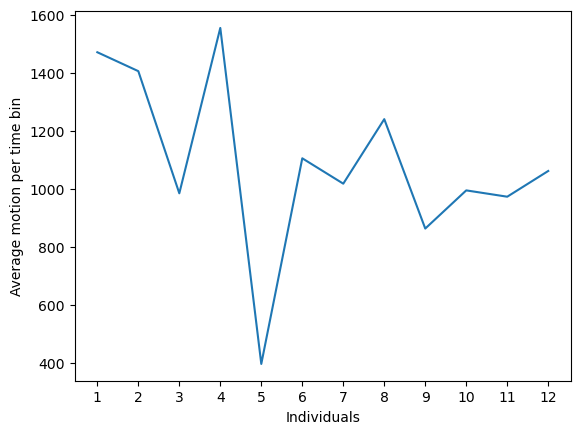

In [26]:
# show overall motion for individuals over experiment ... any outliers? dead?
print(individuals)
plt.plot(df[individuals].mean())
plt.xlabel('Individuals')
plt.ylabel('Average motion per time bin')
plt.show()

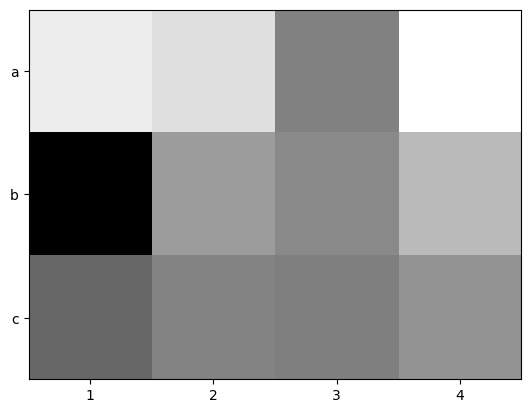

[[6518673.58 6229952.22 4364557.15 6890182.78]
 [1759115.   4899093.37 4511712.32 5497157.06]
 [3826347.19 4409209.19 4312692.7  4705667.06]]


In [27]:
# another look at overall activity in plate ... are there any dead individuals that should be omitted?
# is the difference in illumination across the plate causing big problems?
totalActivity = df[individuals].sum().values
plateView = np.reshape(totalActivity,(3,4))
plt.imshow(plateView, interpolation='nearest', cmap = 'gray')
columns = np.array([1,2,3,4])
rows = ['a','b','c']
plt.xticks(columns-1, columns)
plt.yticks([0,1,2],rows) # or other way?
plt.show()

print(plateView)

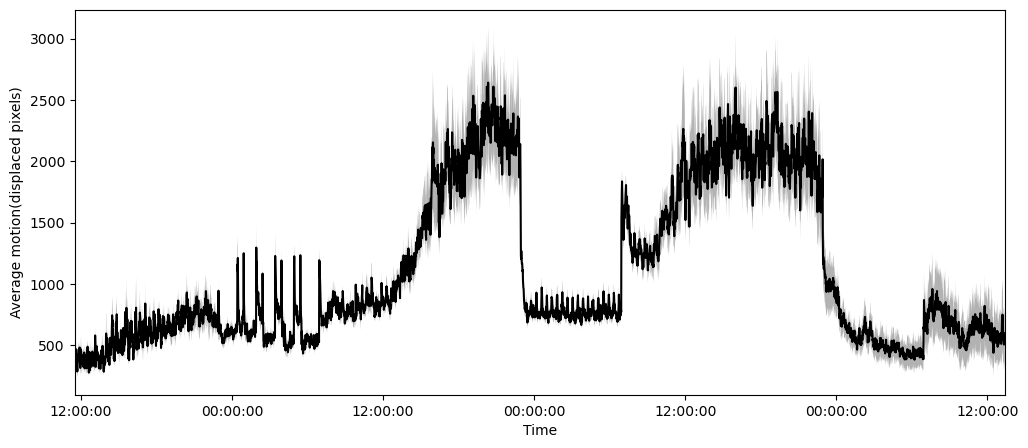

In [30]:
# ribbon plot of average motion
# timeVdataRibbonPlot(ax,t,d,c)
d = df[individuals].values
t = df['time'].values
f,a = plt.subplots(figsize=(12,5))

a = analysisTools.timeVdataRibbonPlot(a,t,d,'k')
a.set_xlabel('Time')
a.set_ylabel('Average motion(displaced pixels)')
plt.show()

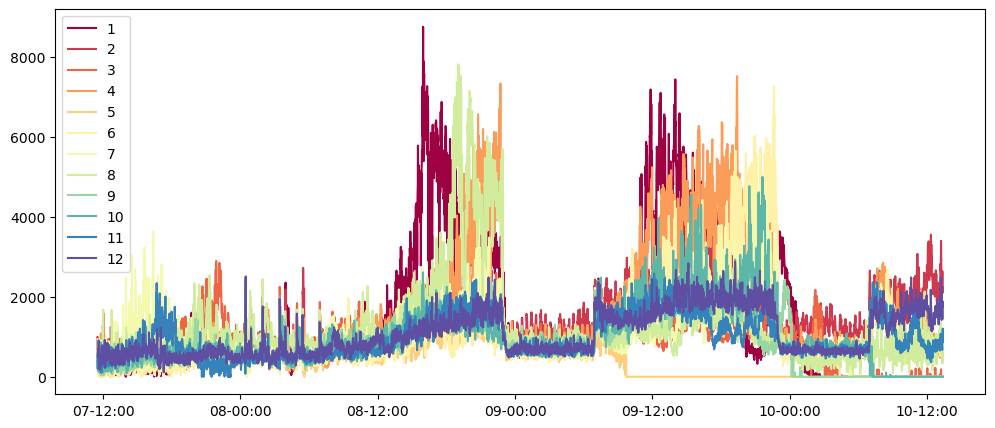

In [59]:
# plot activity of each individual in a different color
def multipleIndividualPlot(df, individuals):
    colormap = 'Spectral'
    cols = analysisTools.make_N_colors(colormap, len(individuals))
    f,a = plt.subplots(figsize = (12,5))
    for i,individual in enumerate(individuals):
        plt.plot(df['time'].values, df[individual].values, color = cols[i] , label = individual)
    plt.legend()
    
    a.xaxis.set_major_formatter( dates.DateFormatter('%d-%H:%M') )
    plt.show()
    
multipleIndividualPlot(df,individuals)

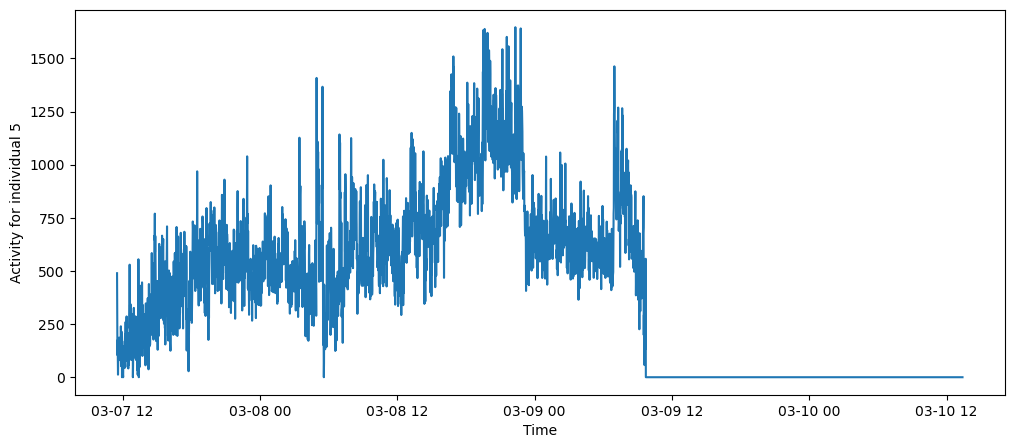

In [48]:
# plot a particular individual
def oneIndividualPlot(individual=1):
    selection = str(individual)
    f,a = plt.subplots(figsize = (12,5))
    plt.plot(timevals, df[selection].values)
    plt.ylabel('Activity for individual ' + selection)
    plt.xlabel('Time')
    plt.show()
    
oneIndividualPlot(5)

# Select subset of data based on time

In [33]:
def timeslice(df, startdate, starttime, duration):
#     startdate = str(year) + '-' + str(month) + '-' + str(day)
#     starttime = str(hour) + ':' + str(minute) + ':' + str(seconds)
    startdatetime = startdate + ' ' + starttime
    
    delta = duration / (60*60*24)
    startdatenum = dates.datestr2num(startdatetime)
    startdatetime = dates.num2date(startdatenum)
    enddatenum = startdatenum + delta
    enddatetime = dates.num2date(enddatenum)
    
    print('Start is ', startdatetime, ' which is ', str(startdatenum))
    print('End is   ', enddatetime, ' which is ', str(enddatenum))
    timeselection = df[df['time'].between(startdatenum,enddatenum)]
    return timeselection

In [39]:
day = '2023-03-07'
time = '20:50:20'
duration = 600
ts = timeslice(df, day, time, duration)
ts

Start is  2023-03-07 20:50:20+00:00  which is  19423.868287037036
End is    2023-03-07 21:00:20+00:00  which is  19423.87523148148


,time,1,2,3,4,5,6,7,8,9,10,11,12
560,19423.868472,986.77,758.02,1479.29,688.17,760.06,597.20,847.63,694.62,626.38,694.56,437.01,651.33
561,19423.869167,926.78,458.29,1279.31,933.71,575.41,608.52,960.27,1024.35,650.47,675.39,256.27,530.77
562,19423.869861,807.59,503.94,1105.73,720.06,850.28,522.11,711.69,962.74,489.27,527.14,425.81,491.23
563,19423.870556,829.74,499.31,1185.79,719.90,929.65,445.03,437.05,891.66,593.65,707.53,306.82,474.28
564,19423.871250,584.36,800.62,1227.47,636.46,892.27,578.68,445.57,762.53,576.80,602.87,466.93,612.68
565,19423.871944,782.43,500.10,1063.45,1015.11,543.56,356.76,583.52,1191.36,266.35,714.98,802.07,483.57
566,19423.872639,1177.63,520.69,1522.01,853.67,527.99,320.07,234.73,1039.93,522.73,585.69,452.26,535.88
567,19423.873333,1436.69,668.59,1550.68,897.94,603.84,320.75,481.12,1137.00,563.69,537.69,375.16,515.25
568,19423.874028,1122.50,497.09,1587.91,956.82,566.47,184.03,639.66,1220.17,582.97,548.86,866.03,477.08
569,19423.874722,1063.32,625.34,1896.09,1074.09,591.22,145.09,548.57,1479.27,539.69,474.35,327.00,540.52


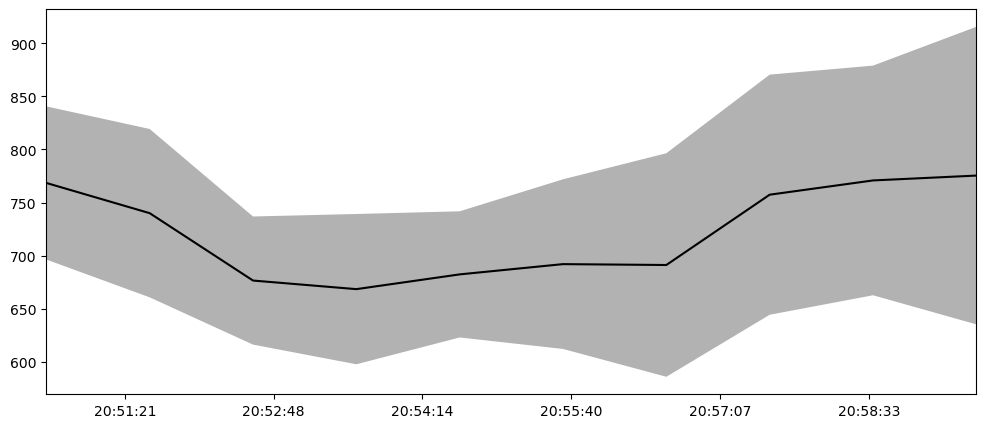

In [42]:
# ribbon plot of average motion
# timeVdataRibbonPlot(ax,t,d,c)
d = ts[individuals].values
t = ts['time'].values
f,a = plt.subplots(figsize=(12,5))

a = analysisTools.timeVdataRibbonPlot(a,t,d,'k')
plt.show()

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


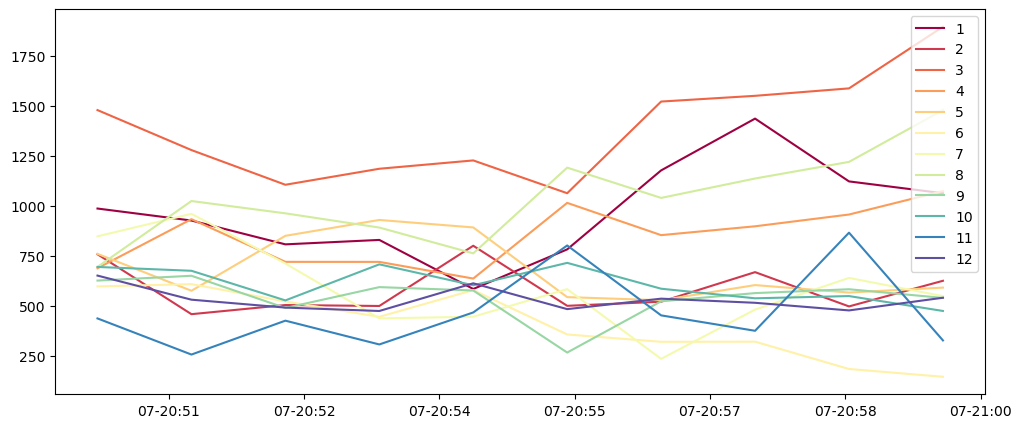

In [60]:
print(individuals)
ts.head(3)
multipleIndividualPlot(ts,individuals)